<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221223_Netflix_Recommendation_System_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/07/05/netflix-recommendation-system-using-python/

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

import zipfile
import io
from google.colab import files

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
upload = files.upload()

Saving Netflix_movies_and_tv_shows_2021.zip to Netflix_movies_and_tv_shows_2021.zip


In [ ]:
z = zipfile.ZipFile(io.BytesIO(upload['Netflix_movies_and_tv_shows_2021.zip']))
z.namelist()

['netflixData.csv']

In [ ]:
filename = z.namelist()[0]
f = z.open(filename)
data = pd.read_csv(f)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [ ]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)

director              0.345902
date_added            0.223731
imdb_score            0.101894
production_country    0.093682
cast                  0.088822
rating                0.000670
release_date          0.000503
duration              0.000503
show_id               0.000000
title                 0.000000
description           0.000000
genres                0.000000
content_type          0.000000
dtype: float64

In [ ]:
cols = [i.lower().replace(' ', '_') for i in data.columns]
data.columns = cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   show_id             5967 non-null   object 
 1   title               5967 non-null   object 
 2   description         5967 non-null   object 
 3   director            3903 non-null   object 
 4   genres              5967 non-null   object 
 5   cast                5437 non-null   object 
 6   production_country  5408 non-null   object 
 7   release_date        5964 non-null   float64
 8   rating              5963 non-null   object 
 9   duration            5964 non-null   object 
 10  imdb_score          5359 non-null   object 
 11  content_type        5967 non-null   object 
 12  date_added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [ ]:
df = data[['title', 'description', 'content_type', 'genres']]
df.head()

,title,description,content_type,genres
0,(Un)Well,This docuseries takes a deep dive into the luc...,TV Show,Reality TV
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Movie,"Horror Movies, International Movies, Thrillers"
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...",Movie,"Documentaries, International Movies"
3,#blackAF,Kenya Barris and his family navigate relations...,TV Show,TV Comedies
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,Movie,"Documentaries, International Movies"


In [ ]:
df.isnull().sum().sort_values(ascending=False)

title           0
description     0
content_type    0
genres          0
dtype: int64

In [ ]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [ ]:
df['clean_title'] = df['title'].apply(clean)

<ipython-input-29-545d44ddc156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_title'] = df['title'].apply(clean)


In [ ]:
df.head()

,title,description,content_type,genres,clean_title
0,(Un)Well,This docuseries takes a deep dive into the luc...,TV Show,Reality TV,unwel
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Movie,"Horror Movies, International Movies, Thrillers",aliv
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...",Movie,"Documentaries, International Movies",annefrank parallel stori
3,#blackAF,Kenya Barris and his family navigate relations...,TV Show,TV Comedies,blackaf
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,Movie,"Documentaries, International Movies",catsthemewvi


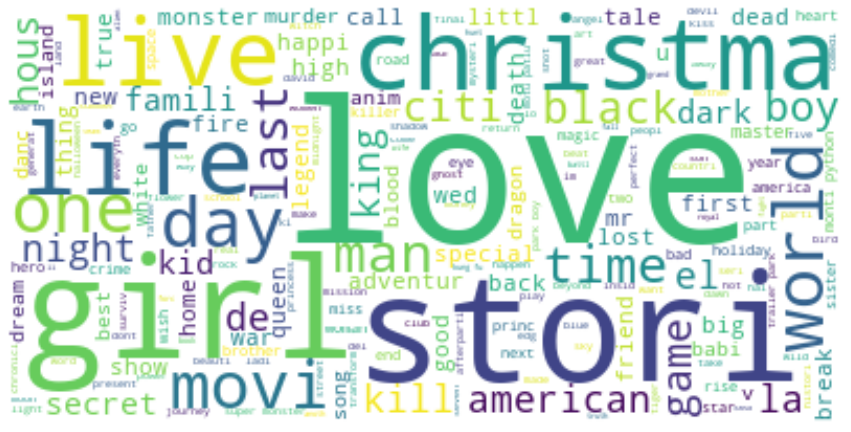

In [ ]:
text_wordcloud = ' '.join(i for i in df['clean_title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text_wordcloud)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
feature = df['genres'].tolist()
feature

['Reality TV',
 'Horror Movies, International Movies, Thrillers',
 'Documentaries, International Movies',
 'TV Comedies',
 'Documentaries, International Movies',
 'Dramas, International Movies, Romantic Movies',
 'Dramas, International Movies, Romantic Movies',
 'Comedies',
 'Documentaries, Sports Movies',
 'Comedies, Dramas, International Movies',
 'Comedies, Dramas, International Movies',
 'Comedies, International Movies, Romantic Movies',
 'Comedies, Dramas, International Movies',
 'International TV Shows, Romantic TV Shows, TV Dramas',
 'Docuseries, Science & Nature TV',
 'Dramas, International Movies, Sports Movies',
 'Movies',
 'Dramas, International Movies',
 'Dramas, International Movies',
 'Horror Movies, International Movies',
 'Crime TV Shows, TV Dramas, TV Mysteries',
 'Crime TV Shows, Docuseries',
 'Documentaries',
 'Documentaries',
 'Comedies, Dramas, Independent Movies',
 'Dramas, Independent Movies, International Movies',
 'Dramas, International Movies',
 'Dramas, Thril

In [ ]:
tfdif = text.TfidfVectorizer(input=feature, stop_words='english')
tfidf_matrix = tfdif.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['clean_title']).drop_duplicates()
indices

clean_title
unwel                           0
aliv                            1
annefrank  parallel stori       2
blackaf                         3
catsthemewvi                    4
                             ... 
الف مبروك                    5962
دفعة القاهرة                 5963
海的儿子                         5964
반드시 잡는다                      5965
최강전사 미니특공대  영웅의 탄생           5966
Length: 5967, dtype: int64

In [ ]:
def netflix_recomm(title, similarity=similarity):
  index = indices[title]
  sim_score = list(enumerate(similarity[index]))
  sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
  sim_score = sim_score[0:10]
  movie_indices = [i[0] for i in sim_score]
  return df['clean_title'].iloc[movie_indices]

In [ ]:
print(netflix_recomm('girlfriend'))

3                          blackaf
285                     washington
417                 arrest develop
434     astronomi club sketch show
451    aunti donna big ol hous fun
656                      big mouth
752                bojack horseman
805                   brew brother
935                       champion
937                  chappell show
Name: clean_title, dtype: object


In [ ]:
test = 'big mouth'

In [ ]:
index = indices[test]
index

656

In [ ]:
sim_scores = list(enumerate(similarity[index]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[0:10]
sim_scores

[(3, 1.0000000000000002),
 (285, 1.0000000000000002),
 (417, 1.0000000000000002),
 (434, 1.0000000000000002),
 (451, 1.0000000000000002),
 (656, 1.0000000000000002),
 (752, 1.0000000000000002),
 (805, 1.0000000000000002),
 (935, 1.0000000000000002),
 (937, 1.0000000000000002)]

In [ ]:
mov_idx = [i[0] for i in sim_scores]
mov_idx

[3, 285, 417, 434, 451, 656, 752, 805, 935, 937]

In [ ]:
df['clean_title'].iloc[mov_idx]

3                          blackaf
285                     washington
417                 arrest develop
434     astronomi club sketch show
451    aunti donna big ol hous fun
656                      big mouth
752                bojack horseman
805                   brew brother
935                       champion
937                  chappell show
Name: clean_title, dtype: object